### Imports

In [129]:
from kymatio.numpy import Scattering1D
from kymatio.datasets import fetch_fsdd
import numpy as np
import os
import scipy.io.wavfile
import matplotlib.pyplot as plt

### Simple sinusoid composed of 3 components: 1, 2, 4 Hz

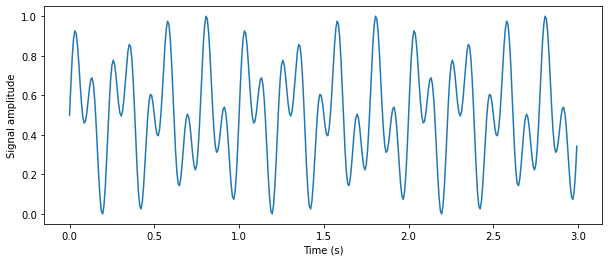

384


In [130]:
fs = 128         # sampling frequency
T = 3          # signal duration
N = fs*T        # number of samples
t = np.linspace(0, T, N, endpoint=False)  # time axis

y = 0

for i in range(2, 4):
    y += np.sin(2*np.pi * i**2 * t) 

# normalize [0-1]
y = (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.show()
print(len(y))

In [131]:
# set parameters for scattering transform
T = len(y)      # length of signal
print('len T =', T)

# The averaging scale is specified as a power of two, 2**J
J = 6        
print(f'Scale J**2 = {2**J}')

# When creating a wavelet scattering network, in addition to the invariance scale, 
# you also set the quality factors for the scattering filter banks. 
# The quality factor for each filter bank is the number of wavelet filters per octave. 
# The wavelet transform discretizes the scales using the specified number of wavelet filters.
Q = 12          

# scattering = Scattering1D(J, T, Q)
scattering = Scattering1D(J=J, shape=T, Q=Q)
Sx = scattering(y[:T])

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

len T = 384
Scale J**2 = 64


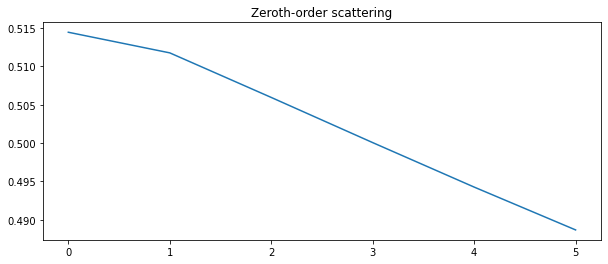

In [132]:
# plot order 0 (which is the mean of the signal)
plt.figure(figsize=(10, 4))
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.show()

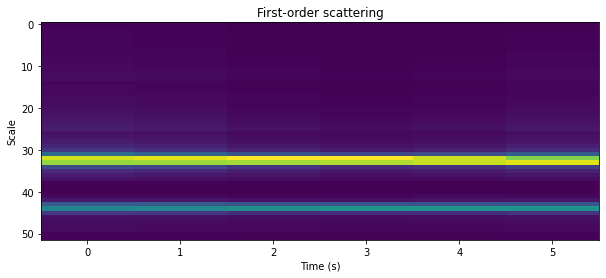

In [133]:
# plot order 1
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order1], aspect='auto', origin='upper')
plt.title('First-order scattering')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.show()

C:\Users\lange\AppData\Local\Temp\ipykernel_4196\2871421229.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=512) >= signal length (=384).
  plt.specgram(y, Fs=fs, NFFT=2**9, noverlap=2**8)


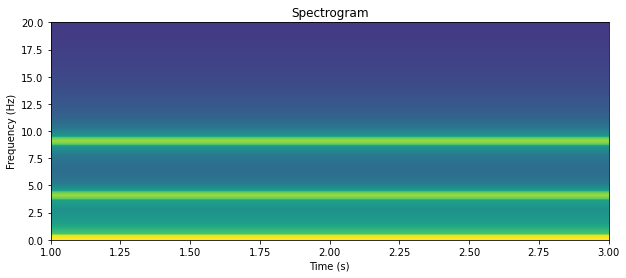

In [134]:
# specgram
plt.figure(figsize=(10, 4))
plt.specgram(y, Fs=fs, NFFT=2**9, noverlap=2**8)
plt.ylim(0, 20)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

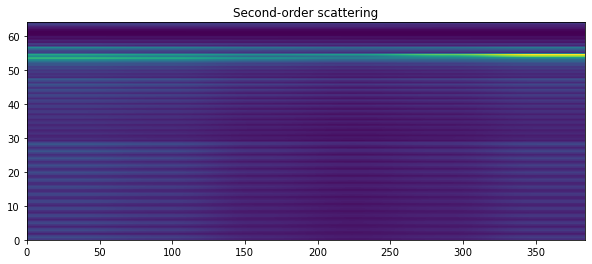

In [135]:
# plot order 1
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order2], aspect='auto', origin='lower', extent=[0, T, 0, fs/2])
plt.title('Second-order scattering')
plt.show()

### Speech signal

In [136]:
info_dataset = fetch_fsdd(verbose=True)
file_path = os.path.join(info_dataset['path_dataset'], sorted(info_dataset['files'])[0])
_, x = scipy.io.wavfile.read(file_path)

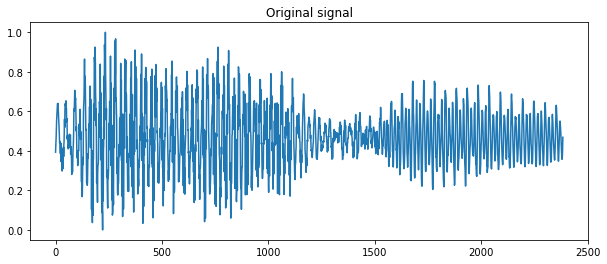

In [137]:
# normalize in range [0, 1]
xmax = np.max(x)
xmin = np.min(x)
x = ((x - xmin) / (xmax - xmin))

# set parameters for scattering transform
T = x.shape[-1] # length of signal
J = 6           # number of scales
Q = 32          # number of wavelets per octave

scattering = Scattering1D(J, T, Q)
Sx = scattering(x)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

# plot the speech signal
plt.figure(figsize=(10, 4))
plt.plot(x)
plt.title('Original signal')
plt.show()

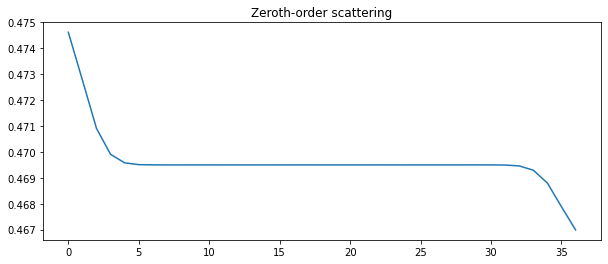

In [138]:
# plot order 0
plt.figure(figsize=(10, 4))
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.show()

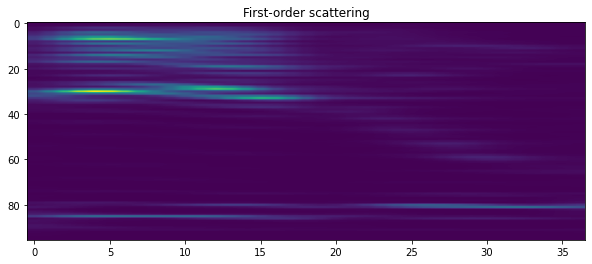

In [139]:
# plot order 1
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order1], aspect='auto', origin='upper')
plt.title('First-order scattering')
plt.show()

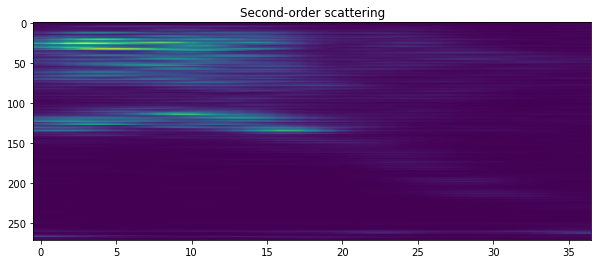

In [140]:
# plot order 2
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order2], aspect='auto', origin='upper')
plt.title('Second-order scattering')
plt.show()

### Chirp signal

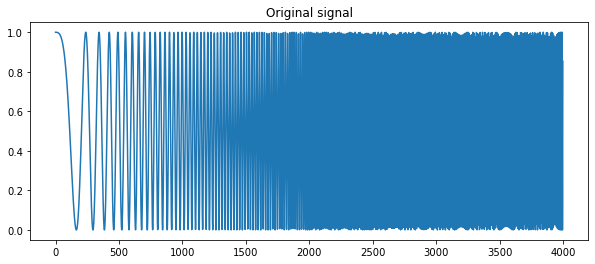

In [141]:
# generate chirp
from scipy.signal import chirp
t = np.linspace(0, 1, 4000, endpoint=False)
sig = chirp(t, f0=2, f1=500, t1=1, method='linear')

# normalize in range [0, 1]
xmax = np.max(sig)
xmin = np.min(sig)
sig = ((sig - xmin) / (xmax - xmin))

# plot the chirp signal
plt.figure(figsize=(10, 4))
plt.plot(sig)
plt.title('Original signal')
plt.show()

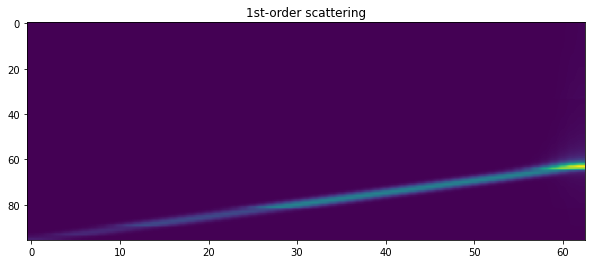

In [142]:
# set parameters for scattering transform
T = len(sig)    # length of signal
J = 6           # number of scales
Q = 32        # number of wavelets per octave

scattering = Scattering1D(J, T, Q)
Sx = scattering(sig)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

# plot order 1
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order1], aspect='auto', origin='upper')
plt.title('1st-order scattering')
plt.show()

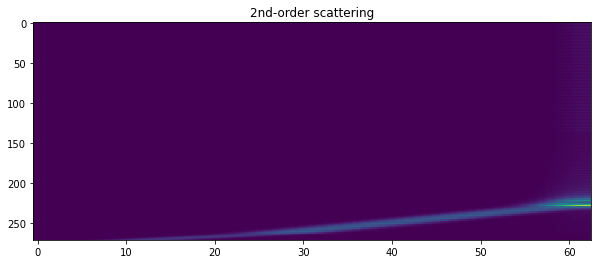

In [143]:
# plot order 2
plt.figure(figsize=(10, 4))
plt.imshow(Sx[order2], aspect='auto', origin='upper')
plt.title('2nd-order scattering')
plt.show()